In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn import tree
import graphviz 
import os
from sklearn import preprocessing 

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy.stats import norm, skew, boxcox


import warnings
warnings.filterwarnings("ignore")

In [51]:
%matplotlib inline

In [52]:
link='/content/drive/MyDrive/data.csv'
dataset=pd.read_csv(link)
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [53]:
len(dataset)

569

About the dataset:
1. id: represents the ID of patient
2. Diagnosis : Diagnosis of cancerous cells(M=malignant, B=benign)
3. Radius_mean : mean radius of cells
4. texture_mean: Standard deviation of gray scale values
5. area_mean: mean of area of cells
6. smoothness mean: mean of local variation in radius lengths
7. compactness_mean: mean of perimeter^2/area -1
8. Concavity_mean: mean of severiity of concave portions to the contour
9. concave points_mean: mean for number of concave portions of the contour
10. symmetery_mean: mean of how symmetrical the cells are
11. fractal_dimension_mean = coastline approximation - 1
12. radius_se: standard error for the mean of distances from center to points on the perimeter
13. texture_se :  standard error for standard deviation of gray-scale values
14. perimeter_se: standard deviation of perimeter
15. area_se: standard deviation on area
16. smoothness_se: standard error for local variation in radius lengths
17. compactness_se: standard error for perimeter^2 / area - 1.0
18. concavity_se: standard error for severity of concave portions of the contour
19. concave points_se: standard error for number of concave portions of the contour
20. symmetery_se: standard deviation of symmetrical data iof cells
21. fractal_dimension_se: standard error for "coastline approximation" - 1
22. radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
23. texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
24. perimeter_worst: "worst" or largest mean value for standard deviation of gray-scale values
25. area_worst: "worst" or largest mean value for standard deviation of gray-scale values
26. smoothness_worst --> "worst" or largest mean value for local variation in radius lengths
27. compactness_worst --> "worst" or largest mean value for perimeter^2 / area - 1.0
28. concavity_worst --> "worst" or largest mean value for severity of concave portions of the contour
29. concave points_worst --> "worst" or largest mean value for number of concave portions of the contour
30. symmetery_worst:  "worst" or largest mean value for standard deviation of gray-scale values
31. fractal_dimension_worst--> "worst" or largest mean value for "coastline approximation" - 1


In [54]:
dataset.drop('id', inplace=True, axis=1)
dataset.drop('Unnamed: 32', inplace=True, axis=1)

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

No null values

In [56]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [57]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [58]:
columns=list(dataset.columns)
columns.remove('diagnosis')

In [59]:
dataset.loc[detect_outliers(dataset,columns)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.22,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,M,22.27,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,M,24.25,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,M,23.27,22.04,152.10,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,M,27.22,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,B,13.24,20.13,86.87,542.9,0.08284,0.1223,0.1010,0.02833,0.1601,0.06432,0.2810,0.8135,3.369,23.81,0.004929,0.06657,0.07683,0.01368,0.01526,0.008133,15.44,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.1357,0.2845,0.12490
485,B,12.45,16.41,82.85,476.7,0.09514,0.1511,0.1544,0.04846,0.2082,0.07325,0.3921,1.2070,5.004,30.19,0.007234,0.07471,0.11140,0.02721,0.03232,0.009627,13.78,21.03,97.82,580.6,0.1175,0.4061,0.4896,0.1342,0.3231,0.10340
242,B,11.30,18.19,73.93,389.4,0.09592,0.1325,0.1548,0.02854,0.2054,0.07669,0.2428,1.6420,2.369,16.39,0.006663,0.05914,0.08880,0.01314,0.01995,0.008675,12.58,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.1218,0.3308,0.12970
15,M,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.04240,0.04741,0.01090,0.01857,0.005466,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410


In [60]:
dataset = dataset.drop(detect_outliers(dataset,columns),axis = 0).reset_index(drop = True)

In [61]:
for i in columns:
    dataset = dataset[dataset[i] != 0]

In [62]:
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
2,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
3,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
4,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,0.2254,1.1080,2.224,19.54,0.004242,0.04639,0.06578,0.01606,0.01638,0.004406,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
480,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.9040,1.936,16.97,0.008200,0.02982,0.05738,0.01267,0.01488,0.004738,12.48,37.16,82.28,474.2,0.1298,0.2517,0.3630,0.09653,0.2112,0.08732
481,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.4920,2.888,29.84,0.007256,0.02678,0.02071,0.01626,0.02080,0.005304,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321
483,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.16280,0.2572,0.06637


In [100]:
dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.00000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,0.680000,13.761691,18.941853,89.158505,3.057852,0.095017,0.092843,-1.883579,0.041971,0.177196,0.061585,-1.357453,1.16441,0.696227,1.938849,-9.117749,-2.787311,0.026004,0.010711,-13.996581,-7.453240,15.688309,25.355832,102.770253,2.334726,0.131020,-1.373025,0.235629,0.105176,0.284630,-16.969237
std,0.466968,2.808054,4.134151,19.126452,0.073955,0.012993,0.038875,0.357580,0.030212,0.023484,0.005339,0.581475,0.48488,0.371442,0.189181,0.984631,0.261952,0.015711,0.004376,2.422850,0.707671,3.798143,5.945520,25.899573,0.033500,0.021684,0.400029,0.162760,0.054904,0.051865,3.380308
min,0.000000,8.196000,9.710000,51.710000,2.843713,0.062510,0.019380,-2.820020,0.001852,0.116700,0.049960,-2.771530,0.36020,-0.287432,1.403112,-11.834694,-3.614107,0.000692,0.001852,-20.369443,-9.437202,8.964000,12.020000,57.260000,2.237863,0.081250,-2.477217,0.001845,0.008772,0.171200,-26.452429
25%,0.000000,11.755000,16.000000,75.525000,3.009275,0.085130,0.062255,-2.136193,0.019485,0.160100,0.057470,-1.767953,0.81380,0.412350,1.817916,-9.753308,-2.976307,0.014285,0.007441,-15.695172,-7.956832,13.060000,20.940000,84.470000,2.312709,0.115050,-1.636767,0.107700,0.063255,0.248750,-19.375170
50%,1.000000,13.170000,18.580000,85.310000,3.053799,0.094620,0.084680,-1.906859,0.030680,0.177000,0.061100,-1.387177,1.06600,0.690875,1.918929,-9.164977,-2.806808,0.022690,0.010300,-13.919583,-7.472805,14.730000,25.110000,96.310000,2.332108,0.130300,-1.382337,0.193700,0.091730,0.278100,-16.980212
75%,1.000000,15.100000,21.410000,98.685000,3.104574,0.103600,0.116200,-1.613561,0.060195,0.192750,0.064840,-0.948061,1.42600,0.958256,2.076628,-8.451089,-2.589215,0.035645,0.013415,-12.405249,-6.946759,17.445000,29.155000,115.800000,2.356594,0.143600,-1.086318,0.337950,0.146250,0.313100,-14.636233
max,1.000000,21.370000,39.280000,141.300000,3.211208,0.139800,0.228400,-1.108122,0.146900,0.274300,0.078390,-0.161904,2.91000,1.585330,2.331920,-6.604093,-2.083903,0.081580,0.034410,-7.340349,-5.520416,27.320000,49.540000,186.800000,2.409153,0.222600,-0.293272,0.772700,0.254300,0.488200,-8.013975


Correlation

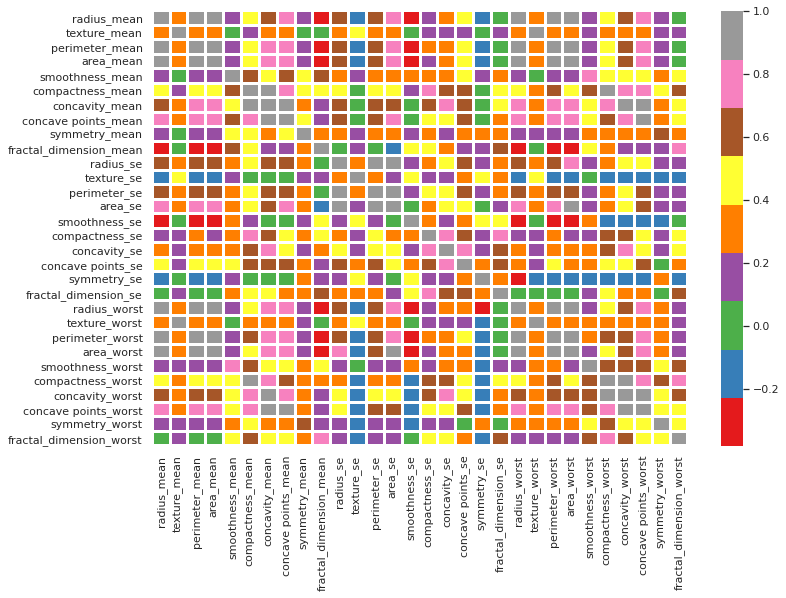

In [63]:

plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap='Set1', linewidths=2)
plt.show()

In [64]:
dataset.agg(['skew'])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
skew,0.720011,0.757858,0.728642,1.113792,0.28629,0.69951,1.048939,0.986016,0.399213,0.559157,1.115118,0.947195,1.173147,1.636322,1.108855,1.029405,0.790304,0.794934,1.325098,1.306202,0.903875,0.472636,0.884642,1.348344,0.370087,1.035461,0.816002,0.508731,0.955154,1.084229


In [65]:
skews = ['area_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 
         'fractal_dimension_worst' ]

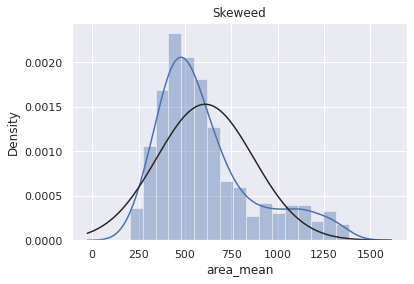

mu area_mean : 609.0452631578947, sigma area_mean : 260.9594334953115



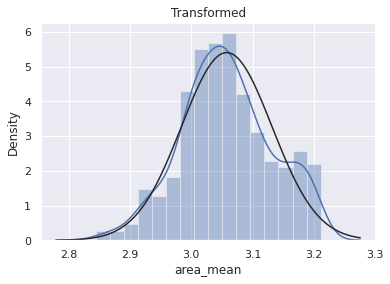

mu area_mean : 3.0578516597017034, sigma area_mean : 0.07387707855324793



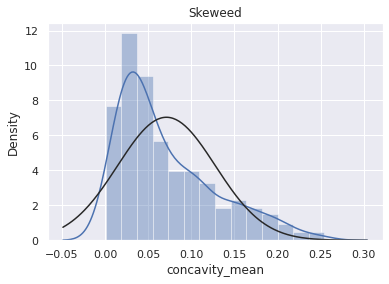

mu concavity_mean : 0.07115835936842106, sigma concavity_mean : 0.05668894912125189



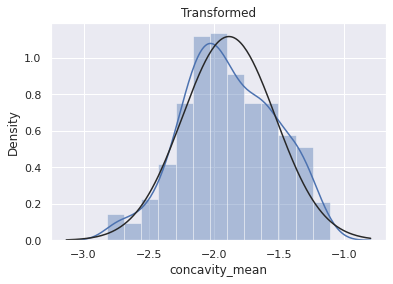

mu concavity_mean : -1.88357857951331, sigma concavity_mean : 0.35720318024270065



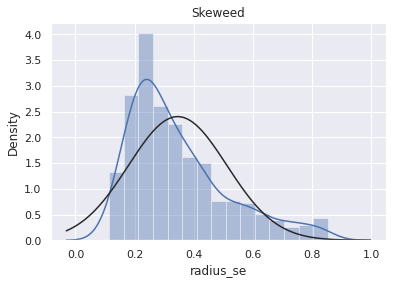

mu radius_se : 0.34573873684210527, sigma radius_se : 0.1661712692073554



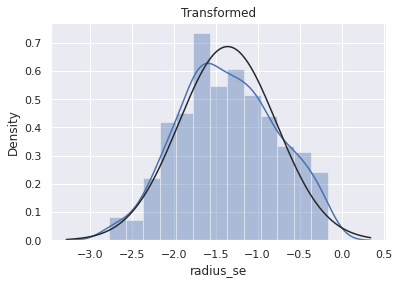

mu radius_se : -1.3574534529550302, sigma radius_se : 0.5808624452763961



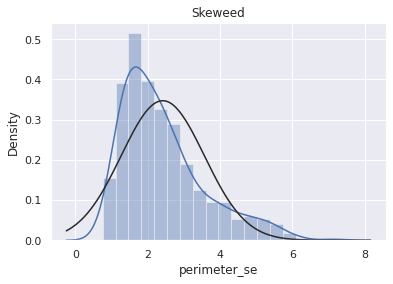

mu perimeter_se : 2.4174414736842103, sigma perimeter_se : 1.1491395681190233



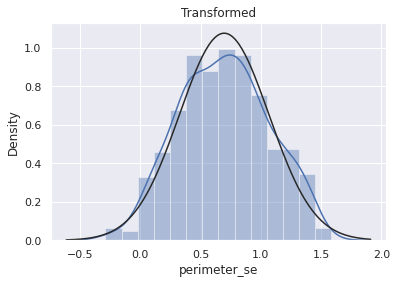

mu perimeter_se : 0.696226664210688, sigma perimeter_se : 0.37105119329944625



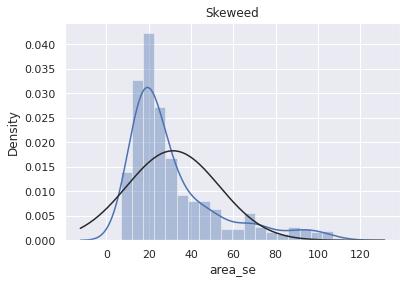

mu area_se : 31.517951578947372, sigma area_se : 21.835686132562007



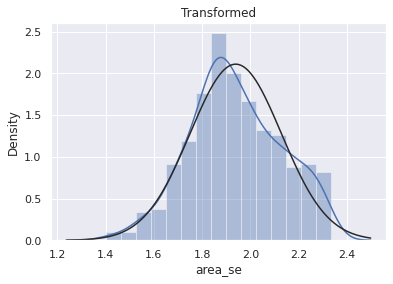

mu area_se : 1.9388494733240202, sigma area_se : 0.1889816697907826



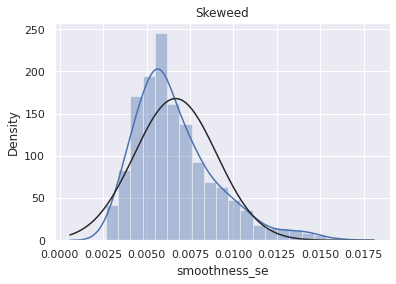

mu smoothness_se : 0.0066738757894736845, sigma smoothness_se : 0.0023764243585563936



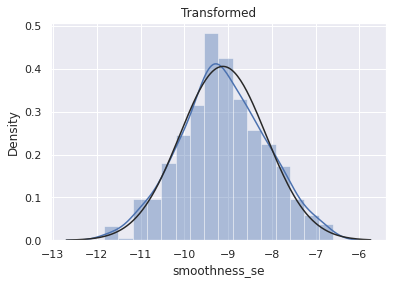

mu smoothness_se : -9.117748673770011, sigma smoothness_se : 0.9835942225367357



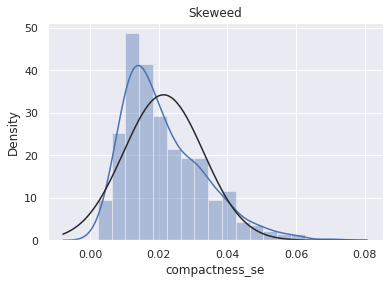

mu compactness_se : 0.021379071578947372, sigma compactness_se : 0.011653458685464321



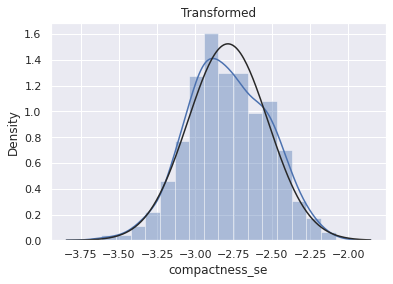

mu compactness_se : -2.7873111572899667, sigma compactness_se : 0.26167581142993224



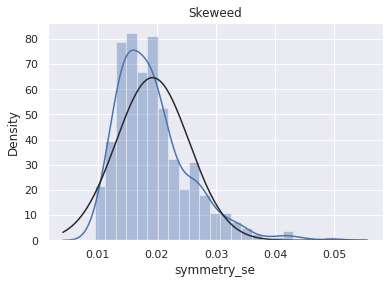

mu symmetry_se : 0.019283107368421055, sigma symmetry_se : 0.006171211684063726



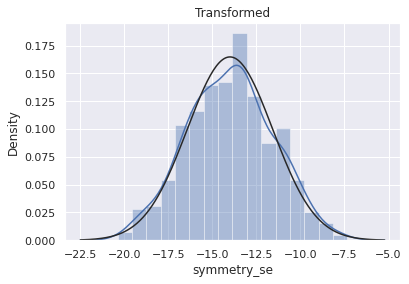

mu symmetry_se : -13.996580816563538, sigma symmetry_se : 2.4202983374739624



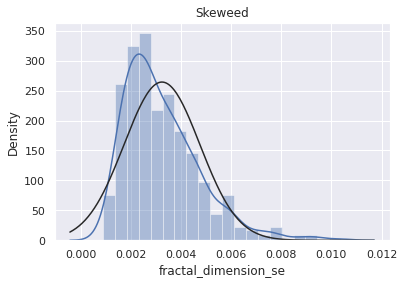

mu fractal_dimension_se : 0.0032441122105263155, sigma fractal_dimension_se : 0.0015092795308666344



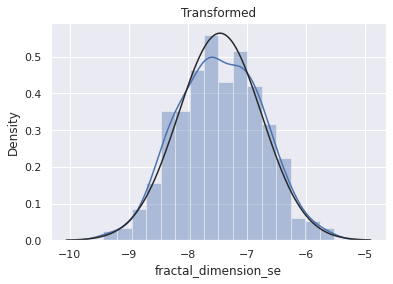

mu fractal_dimension_se : -7.4532399380826515, sigma fractal_dimension_se : 0.7069257254460515



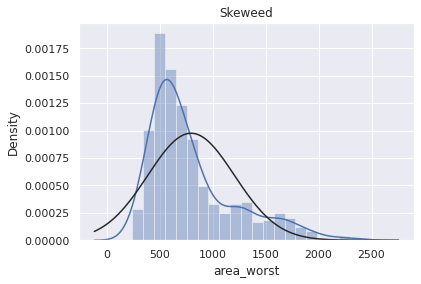

mu area_worst : 797.7282105263158, sigma area_worst : 408.99590635444326



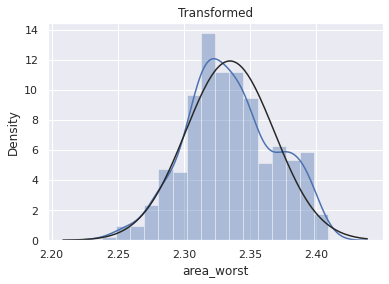

mu area_worst : 2.334726281620159, sigma area_worst : 0.033465177382711556



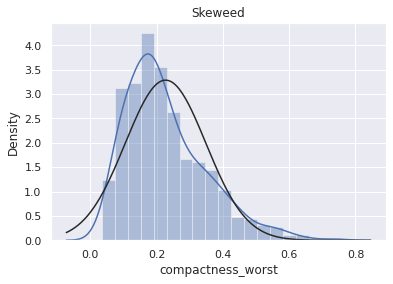

mu compactness_worst : 0.227338, sigma compactness_worst : 0.12149222486016825



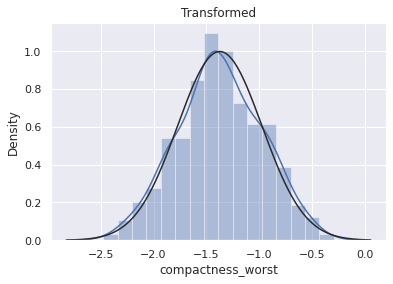

mu compactness_worst : -1.3730248582175169, sigma compactness_worst : 0.39960741114629106



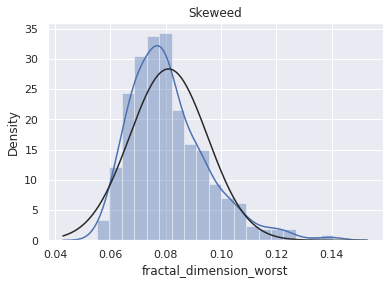

mu fractal_dimension_worst : 0.08104783157894735, sigma fractal_dimension_worst : 0.014082149706297746



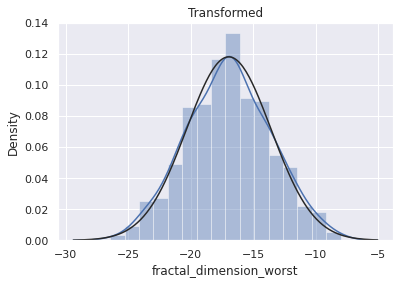

mu fractal_dimension_worst : -16.969237472097173, sigma fractal_dimension_worst : 3.3767483188535325



In [66]:
for i in skews:
    sns.set_style('darkgrid')
    sns.distplot(dataset[i], fit = norm)
    plt.title('Skeweed')
    plt.show()
    (mu, sigma) = norm.fit(dataset[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()
    
    dataset[i], lam = boxcox(dataset[i])

    sns.set_style('darkgrid')
    sns.distplot(dataset[i], fit = norm)
    plt.title('Transformed')
    plt.show()
    (mu, sigma) = norm.fit(dataset[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()

In [67]:
dataset.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
radius_mean,0.720011,-0.062922
texture_mean,0.757858,1.321968
perimeter_mean,0.728642,-0.082650
area_mean,0.012258,-0.286224
smoothness_mean,0.286290,-0.048698
compactness_mean,0.699510,-0.027619
concavity_mean,-0.046413,-0.463425
concave points_mean,0.986016,0.159707
symmetry_mean,0.399213,0.517492
fractal_dimension_mean,0.559157,0.139716


In [68]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [69]:
unique_mapping={'M':0, 'B':1}
dataset['diagnosis']=dataset['diagnosis'].map(unique_mapping)

In [70]:
X=dataset[columns]
Y=dataset['diagnosis']

In [71]:
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=1/3, random_state=42)

X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 475
Total # of sample in train dataset: 316
Total # of sample in validation dataset: 79
Total # of sample in test dataset: 80


Pipeline

In [72]:
pipeline_GaussianNB = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_GaussianNB",GaussianNB())])

pipeline_BernoulliNB = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_BernoulliNB",BernoulliNB())])

pipeline_LogisticRegression = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_LogisticRegression",LogisticRegression())])

pipeline_RandomForest = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_RandomForest",RandomForestClassifier())])

pipeline_SVM = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_SVM",SVC())])

pipeline_DecisionTree = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_DecisionTree",DecisionTreeClassifier())])

pipeline_KNN = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_KNN",KNeighborsClassifier())])

pipeline_GBC = Pipeline([("scaler",StandardScaler()), (
                        "pipeline_GBC",GradientBoostingClassifier())])

pipeline_SGD = Pipeline([("scaler",StandardScaler()), 
                        ("pipeline_SGD",SGDClassifier(max_iter=5000, random_state=0))])

pipeline_NN = Pipeline([("scaler",StandardScaler()), 
                        ("pipeline_NN",MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1))])

pipelines = [pipeline_GaussianNB, pipeline_BernoulliNB, pipeline_LogisticRegression,
             pipeline_RandomForest, pipeline_SVM, pipeline_DecisionTree, pipeline_KNN,
             pipeline_GBC, pipeline_SGD, pipeline_NN]

In [73]:
pipe_dict = {0: "GaussianNB", 1: "BernoulliNB", 2: "LogisticRegression",3: "RandomForestClassifier", 4: "SupportVectorMachine", 5: "DecisionTreeClassifier",
            6: "KNeighborsClassifier", 7: "GradientBoostingClassifier", 8:"Stochastic Gradient Descent", 9: "Neural Nets"}

In [74]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [75]:
cv_results_acc = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring = "accuracy", cv = 10)
    cv_results_acc.append(cv_score)
    print("%s: %f" % (pipe_dict[i], cv_score.mean()*100))

GaussianNB: 93.981855
BernoulliNB: 93.699597
LogisticRegression: 97.792339
RandomForestClassifier: 95.877016
SupportVectorMachine: 97.792339
DecisionTreeClassifier: 92.731855
KNeighborsClassifier: 96.844758
GradientBoostingClassifier: 95.252016
Stochastic Gradient Descent: 95.574597
Neural Nets: 97.479839


SVM and LR having maximu cross validation accuracy and Neaural Nets is second highest.

## Metrics theory

1. Accuracy: In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

2. Balanced Accuracy: The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

3. Cohen's Kappa: The function cohen_kappa_score computes Cohen’s kappa statistic. This measure is intended to compare labelings by different human annotators, not a classifier versus a ground truth.The kappa score (see docstring) is a number between -1 and 1. Scores above .8 are generally considered good agreement; zero or lower means no agreement (practically random labels).

4. Average Precision: AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight:

5. Log Loss:aka logistic loss or cross-entropy loss.This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true. The log loss is only defined for two or more labels. For a single sample with true label  
y
∈
{
0
,
1
}
  and a probability estimate  
p
=
Pr
(
y
=
1
)
 
6. Jaccard Coefficient Score: The Jaccard index, or Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels in y_true.

## SVM

In [76]:
train_score = pipeline_SVM.score(X_train, y_train)
print(f'Train score of trained model     : {train_score*100}')

validation_score = pipeline_SVM.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score*100}')

test_score = pipeline_SVM.score(X_test, y_test)
print(f'Test score of trained model      : {test_score*100}')

Train score of trained model     : 99.36708860759494
Validation score of trained model: 94.9367088607595
Test score of trained model      : 96.25


In [77]:
pred_svm = pipeline_SVM.predict(X_test)

Confussion Matrix: 
[[21  2]
 [ 1 56]]



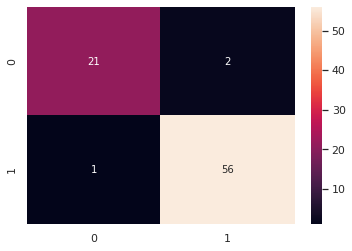

In [78]:
conf_matrix = confusion_matrix(pred_svm, y_test)

print(f'Confussion Matrix: \n{conf_matrix}\n')

sns.heatmap(conf_matrix, annot=True)
plt.show()

In [79]:
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

In [80]:
accuracy  = (tp + tn) / total 
precision = tp / (tp + fp) 
recall    = tp / (tp + fn) 
f1score  = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp) 
error_rate = (fp + fn) / total 
prevalence = real_positive / total
miss_rate = fn / real_positive 
fall_out = fp / real_negative 

print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')
print(f'Specificity : {specificity}')
print(f'Error Rate  : {error_rate}')
print(f'Prevalence  : {prevalence}')
print(f'Miss Rate   : {miss_rate}')
print(f'Fall Out    : {fall_out}')

Accuracy    : 0.9625
Precision   : 0.9655172413793104
Recall      : 0.9824561403508771
F1 score    : 0.9739130434782608
Specificity : 0.9130434782608695
Error Rate  : 0.0375
Prevalence  : 0.7125
Miss Rate   : 0.017543859649122806
Fall Out    : 0.08695652173913043


In [81]:
print(classification_report(pred_svm, y_test))


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.97      0.98      0.97        57

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.95        80
weighted avg       0.96      0.96      0.96        80



In [82]:
print("accuracy           :", metrics.accuracy_score(y_test, pred_svm)*100)
print("balanced_accuracy  :", metrics.balanced_accuracy_score(y_test, pred_svm))
print("Cohen’s Kappa      :", metrics.cohen_kappa_score(y_test, pred_svm))
print("average_precision  :", metrics.average_precision_score(y_test, pred_svm)*100)
print("neg_log_loss       :", metrics.log_loss(y_test, pred_svm)*100)
print("jaccard            :", metrics.jaccard_score(y_test, pred_svm)*100)

accuracy           : 96.25
balanced_accuracy  : 0.9600313479623825
Cohen’s Kappa      : 0.9072642967542504
average_precision  : 97.35783424077435
neg_log_loss       : 129.52141097770289
jaccard            : 94.91525423728814


## LR

In [83]:
train_score = pipeline_LogisticRegression.score(X_train, y_train)
print(f'Train score of trained model     : {train_score*100}')

validation_score = pipeline_LogisticRegression.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score*100}')

test_score = pipeline_LogisticRegression.score(X_test, y_test)
print(f'Test score of trained model      : {test_score*100}')

Train score of trained model     : 99.68354430379746
Validation score of trained model: 97.46835443037975
Test score of trained model      : 97.5


In [84]:
pred_lr = pipeline_LogisticRegression.predict(X_test)

Confussion Matrix: 
[[21  1]
 [ 1 57]]



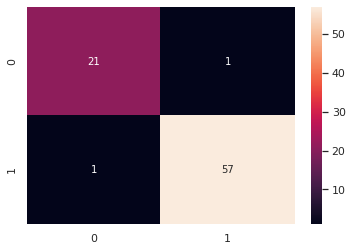

In [85]:
conf_matrix = confusion_matrix(pred_lr, y_test)

print(f'Confussion Matrix: \n{conf_matrix}\n')

sns.heatmap(conf_matrix, annot=True)
plt.show()

In [86]:
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

In [87]:
accuracy  = (tp + tn) / total 
precision = tp / (tp + fp) 
recall    = tp / (tp + fn) 
f1score  = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp) 
error_rate = (fp + fn) / total 
prevalence = real_positive / total
miss_rate = fn / real_positive 
fall_out = fp / real_negative 

print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')
print(f'Specificity : {specificity}')
print(f'Error Rate  : {error_rate}')
print(f'Prevalence  : {prevalence}')
print(f'Miss Rate   : {miss_rate}')
print(f'Fall Out    : {fall_out}')

Accuracy    : 0.975
Precision   : 0.9827586206896551
Recall      : 0.9827586206896551
F1 score    : 0.9827586206896551
Specificity : 0.9545454545454546
Error Rate  : 0.025
Prevalence  : 0.725
Miss Rate   : 0.017241379310344827
Fall Out    : 0.045454545454545456


In [88]:
print(classification_report(pred_lr, y_test))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.98      0.98      0.98        58

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [89]:
print("accuracy           :", metrics.accuracy_score(y_test, pred_lr)*100)
print("balanced_accuracy  :", metrics.balanced_accuracy_score(y_test, pred_lr))
print("Cohen’s Kappa      :", metrics.cohen_kappa_score(y_test, pred_lr))
print("average_precision  :", metrics.average_precision_score(y_test, pred_lr)*100)
print("neg_log_loss       :", metrics.log_loss(y_test, pred_lr)*100)
print("jaccard            :", metrics.jaccard_score(y_test, pred_lr)*100)

accuracy           : 97.5
balanced_accuracy  : 0.9686520376175549
Cohen’s Kappa      : 0.9373040752351097
average_precision  : 97.83145065398335
neg_log_loss       : 86.34794048406455
jaccard            : 96.61016949152543


## Neural Nets

In [90]:
train_score = pipeline_NN.score(X_train, y_train)
print(f'Train score of trained model     : {train_score*100}')

validation_score = pipeline_NN.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score*100}')

test_score = pipeline_NN.score(X_test, y_test)
print(f'Test score of trained model      : {test_score*100}')

Train score of trained model     : 100.0
Validation score of trained model: 97.46835443037975
Test score of trained model      : 93.75


In [91]:
pred_nn = pipeline_NN.predict(X_test)

Confussion Matrix: 
[[20  3]
 [ 2 55]]



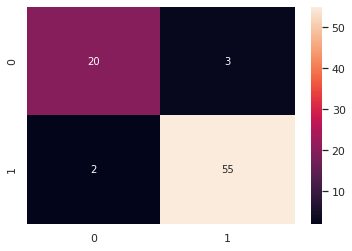

In [92]:
conf_matrix = confusion_matrix(pred_nn, y_test)

print(f'Confussion Matrix: \n{conf_matrix}\n')

sns.heatmap(conf_matrix, annot=True)
plt.show()

In [93]:
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

In [94]:
accuracy  = (tp + tn) / total 
precision = tp / (tp + fp) 
recall    = tp / (tp + fn) 
f1score  = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp) 
error_rate = (fp + fn) / total 
prevalence = real_positive / total
miss_rate = fn / real_positive 
fall_out = fp / real_negative 

print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')
print(f'Specificity : {specificity}')
print(f'Error Rate  : {error_rate}')
print(f'Prevalence  : {prevalence}')
print(f'Miss Rate   : {miss_rate}')
print(f'Fall Out    : {fall_out}')

Accuracy    : 0.9375
Precision   : 0.9482758620689655
Recall      : 0.9649122807017544
F1 score    : 0.9565217391304347
Specificity : 0.8695652173913043
Error Rate  : 0.0625
Prevalence  : 0.7125
Miss Rate   : 0.03508771929824561
Fall Out    : 0.13043478260869565


In [95]:
print(classification_report(pred_nn, y_test))


              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.95      0.96      0.96        57

    accuracy                           0.94        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.94      0.94      0.94        80



In [96]:
print("accuracy           :", metrics.accuracy_score(y_test, pred_nn)*100)
print("balanced_accuracy  :", metrics.balanced_accuracy_score(y_test, pred_nn))
print("Cohen’s Kappa      :", metrics.cohen_kappa_score(y_test, pred_nn))
print("average_precision  :", metrics.average_precision_score(y_test, pred_nn)*100)
print("neg_log_loss       :", metrics.log_loss(y_test, pred_nn)*100)
print("jaccard            :", metrics.jaccard_score(y_test, pred_nn)*100)

accuracy           : 93.75
balanced_accuracy  : 0.9286833855799372
Cohen’s Kappa      : 0.8454404945904173
average_precision  : 95.25030248033877
neg_log_loss       : 215.86935146176734
jaccard            : 91.66666666666666


## Metrics table

In [97]:
metrics_data = [
['Accuracy',metrics.accuracy_score(y_test, pred_svm)*100 ,metrics.accuracy_score(y_test, pred_lr)*100 ,metrics.accuracy_score(y_test, pred_nn)*100],
['Balanced Accuracy',metrics.balanced_accuracy_score(y_test, pred_svm),metrics.balanced_accuracy_score(y_test, pred_lr),metrics.balanced_accuracy_score(y_test, pred_nn)],
['Cohens Kappa',metrics.cohen_kappa_score(y_test, pred_svm),metrics.cohen_kappa_score(y_test, pred_lr),metrics.cohen_kappa_score(y_test, pred_nn)],
['Average Precision',metrics.average_precision_score(y_test, pred_svm)*100,metrics.average_precision_score(y_test, pred_lr)*100,metrics.average_precision_score(y_test, pred_nn)*100 ],
['Log Loss', metrics.log_loss(y_test, pred_svm)*100,metrics.log_loss(y_test, pred_lr)*100,metrics.log_loss(y_test, pred_nn)*100],
['Jaccard',  metrics.jaccard_score(y_test, pred_svm)*100, metrics.jaccard_score(y_test, pred_lr)*100, metrics.jaccard_score(y_test, pred_nn)*100]     
          ]

In [98]:
df=pd.DataFrame(metrics_data, columns=['Metric','SVM', 'LR', 'NN'])

In [99]:
df

,Metric,SVM,LR,NN
0,Accuracy,96.250000,97.500000,93.750000
1,Balanced Accuracy,0.960031,0.968652,0.928683
2,Cohens Kappa,0.907264,0.937304,0.845440
3,Average Precision,97.357834,97.831451,95.250302
4,Log Loss,129.521411,86.347940,215.869351
5,Jaccard,94.915254,96.610169,91.666667


Logistic Regression is a better model for the wiscosin cancer dataset.